In [345]:
import pandas as pd # For dataframes (tables)
import numpy as np
import matplotlib.pyplot as plt # For plots
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [346]:
mydatasets_folder = "/home/araldo/datasets"
df = pd.read_csv(mydatasets_folder +'/video-qoe-processed/df_2.csv')

In [347]:
df.head()

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,IPSrc0,IPDst0,Protocol0,PacketsSent0,PacketsReceived0,...,BufferValid,KBytesReceived,label,label_num,KBytesReceived_log,PacketsSent_log,PacketsReceived_log,BytesSent_log,BytesReceived_log,BufferProgress_log
0,6.1,29,57,2372,79344,192.168.1.190,173.194.55.23,QUIC,29,57,...,True,79.344,q480p,480,4.373793,3.401197,4.060443,7.771910,11.281561,0.005164
1,5.8,7,39,625,52973,192.168.1.190,74.125.155.199,QUIC,4,36,...,True,52.973,q360p,360,3.969782,2.079442,3.688879,6.439350,10.877557,0.004833
2,7.3,16,23,1056,34178,192.168.1.190,74.125.155.201,TCP,16,23,...,True,34.178,q720p,720,3.531582,2.833213,3.178054,6.963190,10.439367,0.005473
3,39.2,14,29,3377,36821,192.168.1.190,172.217.135.40,0,0,0,...,True,36.821,q144p,144,3.606068,2.708050,3.401197,8.125039,10.513851,0.009268
4,4.6,9,77,900,104389,192.168.1.190,173.194.184.103,QUIC,9,77,...,True,104.389,q360p,360,4.648124,2.302585,4.356709,6.803505,11.555889,0.006599


In [348]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 207 columns):
RelativeTime           float64
PacketsSent            int64
PacketsReceived        int64
BytesSent              int64
BytesReceived          int64
IPSrc0                 object
IPDst0                 object
Protocol0              object
PacketsSent0           int64
PacketsReceived0       int64
BytesSent0             int64
BytesReceived0         int64
IPSrc1                 object
IPDst1                 object
Protocol1              object
PacketsSent1           int64
PacketsReceived1       int64
BytesSent1             int64
BytesReceived1         int64
IPSrc2                 object
IPDst2                 object
Protocol2              object
PacketsSent2           int64
PacketsReceived2       int64
BytesSent2             int64
BytesReceived2         int64
IPSrc3                 object
IPDst3                 object
Protocol3              object
PacketsSent3           int64
PacketsRec

Let's study the dependency between `label` and `KBytesReceived`

Let's first plot the data as they are, using a scatterplot.

See [mathplotlib documentation](https://matplotlib.org/tutorials/introductory/lifecycle.html) for more info (optional).

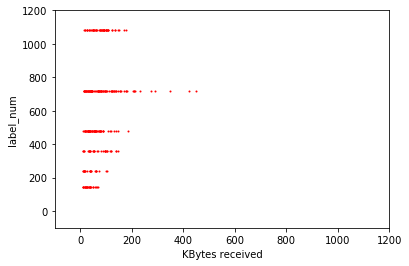

In [349]:
fig, ax = plt.subplots() # This creates just a canvas
ax.scatter(df['KBytesReceived'],df['label_num'],color='red',s=1) # ax is the actual figure

# Customize the plot
ax.set(xlim=[-100,1200], ylim=[-100,1200], ylabel="label_num",
      xlabel="KBytes received")

# Save it to the disk
fig.savefig('img/scatter.pdf')

In [350]:
df_train, df_test = train_test_split(df, test_size=0.2)
df_test.head()

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,IPSrc0,IPDst0,Protocol0,PacketsSent0,PacketsReceived0,...,BufferValid,KBytesReceived,label,label_num,KBytesReceived_log,PacketsSent_log,PacketsReceived_log,BytesSent_log,BytesReceived_log,BufferProgress_log
275,2.7,0,107,0,109903,0,0,0,0,0,...,True,109.903,q720p,720,4.699598,0.000000,4.682131,0.000000,11.607363,0.002304
105,9.3,10,21,1973,29232,192.168.1.190,173.194.7.107,QUIC,7,21,...,True,29.232,q144p,144,3.375264,2.397895,3.091042,7.587817,10.283053,0.005681
163,4.2,15,72,2224,94952,192.168.1.190,74.125.155.235,QUIC,10,67,...,True,94.952,q360p,360,4.553372,2.772589,4.290459,7.707512,11.461137,0.007238
218,8.7,24,46,2578,62996,192.168.1.190,173.194.191.70,QUIC,24,46,...,True,62.996,q1080p,1080,4.143071,3.218876,3.850148,7.855157,11.050842,0.005245
198,4.5,55,82,4856,121852,192.168.1.190,173.194.53.38,TCP,55,82,...,True,121.852,q720p,720,4.802807,4.025352,4.418841,8.488176,11.710571,0.003931


Let's split the dataset in 80% training set, 20% test set.

Try to run the code above multiple times.

What do you observe? Is it a problem? How do you solve it?

To achieve reproducibility, set the seed

In [351]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_test.head()

print('Training samples ', df_train.shape[0], '; Test samples ', df_test.shape[0])

Training samples  233 ; Test samples  59


## Univariate Linear Regression

**Goal**: Predict `label_num` based on `KBytesReceived`

In [352]:
df_train[['KBytesReceived','label_num']]

,KBytesReceived,label_num
138,37.584,144
150,137.403,480
70,91.872,1080
251,19.488,240
175,185.401,480
42,104.400,1080
73,46.677,720
168,119.712,720
5,114.236,360
193,86.304,1080


Let's separate the independent variables $X$ from the dependent variables $y$

In [353]:
# .reshape(-1, 1) is needed since we have one single feature
X_train = df_train['KBytesReceived'].values

# Models want matrices as input, while now we have a 1D array.
# We need to do the following
X_train = X_train.reshape(-1, 1);

y_train = df_train['label_num'].values;


# Do the same for the test dataset
X_test = df_test['KBytesReceived'].values

# Models want matrices as input, while now we have a 1D array.
# We need to do the following
X_test = X_test.reshape(-1, 1);

y_test = df_test['label_num'].values;

Let's train our first supervised learning model: an Ordinary Least Squares model.

In [354]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train,y_train)

print("theta_0 = ", model.intercept_, "; theta_1 = ", model.coef_)

theta_0 =  527.5463632370178 ; theta_1 =  [1.11462853]


Now we have a trained model $h_{\theta*}(\cdot)$ stored in `model`. We can use it to predict new values.

In [355]:
newKBytesReceivedSamples = np.array([257, 524, 613, 223])

# Models want matrices as input, while now we have a 1D array.
# We need to do the following
newKBytesReceivedSamples = newKBytesReceivedSamples.reshape(-1, 1)

predictedLabels = model.predict(newKBytesReceivedSamples)
predictedLabels

array([ 814.00589428, 1111.61171058, 1210.81364935,  776.10852442])

To plot the model, we let it predict on an interval

In [356]:
interval = np.array([-100,1200]).reshape(-1,1)
h_values = model.predict(interval)

Let's plot the new model

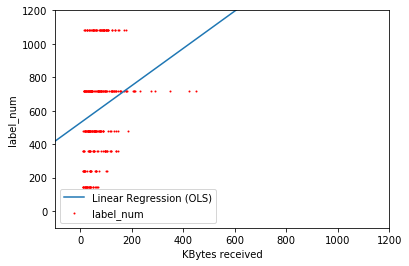

In [357]:
ax.plot(interval,h_values, label="Linear Regression (OLS)")
ax.legend()

fig.savefig('img/QoE-prediction-OLS.pdf')
fig

In [358]:
print("theta_0 = ", model.intercept_, "; theta_1 = ", model.coef_)

theta_0 =  527.5463632370178 ; theta_1 =  [1.11462853]


The model we get is

$$
    h_{\theta*}(x) = 327.6 + 0.7 x
$$

Let's evaluate the model on the test set

In [359]:
y_pred = model.predict(X_test)

Let us compare the true test labels and the predicted

In [360]:
pd.DataFrame({'true':y_test,'pred':y_pred})

,true,pred
0,360,633.718074
1,144,597.366694
2,720,668.044174
3,720,634.346725
4,720,574.084333
5,720,632.597873
6,480,591.160442
7,720,623.743263
8,1080,613.119739
9,1080,648.685306


Let's compute the Mean Square Error (MSE)

In [361]:
MSE = mean_squared_error(y_test, y_pred)
MSE

89761.25092432198

The Root MSE is easier to understand

In [362]:
RMSE_one_feature = math.sqrt(MSE)
RMSE_one_feature

299.6018206291844




### Use transformed variables

We observe that the values of `KBytesReceived` are squashed toward small values (we also checked it with a histogram in the last notebook). We have shown in the last notebook that in this case a log transformation can unveil correlation.

We now show that it also improves the model. First, have a look at the plot

[Text(0, 0.5, 'label_num'), Text(0.5, 0, 'KBytesReceived_log')]

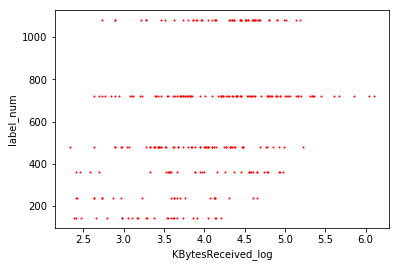

In [363]:
fig, ax = plt.subplots()
ax.scatter(df['KBytesReceived_log'],df['label_num'],color='red',s=1)
ax.set(ylabel="label_num",xlabel="KBytesReceived_log")

Let's train the new model

In [364]:
X_train = df_train['KBytesReceived_log'].values.reshape(-1,1)
X_test = df_test['KBytesReceived_log'].values.reshape(-1,1)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's plot the corresponding line

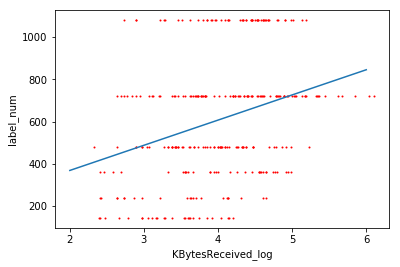

In [365]:
interval = np.array([2,6]).reshape(-1,1)
h_values = model.predict(interval)
ax.plot(interval, h_values, label="transformed model")
fig

Let's check the test error

In [366]:
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE_1_feature = math.sqrt(MSE)
RMSE_1_feature

288.69197221686903

Using the logarithmic transformation, we improved the model.

## Multivariate Linear Regression

Can we improve the test loss if we use other features?

Have a first look at the more correlated features (see notebook on data exploration)

In [367]:
corrmatrix = df.corr().round(3)
corr_to_label_num = corrmatrix['label_num']
# We sort based on the absolute value (see https://stackoverflow.com/a/30486411/2110769)
corr_to_label_num.reindex(corr_to_label_num.abs().sort_values(ascending=False).index)

label_num              1.000
EpochTime             -0.408
StartTime             -0.408
PacketsSent            0.384
PacketsSent0           0.363
BytesReceived_log      0.340
KBytesReceived_log     0.340
PacketsReceived_log    0.336
BytesSent0             0.297
BytesReceived          0.264
KBytesReceived         0.264
PacketsSent_log        0.257
PacketsReceived        0.252
BytesSent3            -0.234
BytesSent              0.225
BytesReceived0         0.203
PacketsReceived0       0.199
BytesSent4            -0.182
PacketsSent3          -0.148
PacketsSent1           0.136
PlaybackProgress      -0.133
BytesSent6            -0.130
BytesSent15           -0.122
PacketsSent15         -0.120
PacketsReceived1       0.107
BytesReceived1         0.106
PacketsSent4          -0.105
BufferHealth           0.104
BytesSent1             0.104
BytesReceived5        -0.099
                       ...  
PacketsSent20            NaN
PacketsReceived20        NaN
BytesSent20              NaN
BytesReceived2

Let's add `StartTime` among the regressors

In [368]:
cols = ['KBytesReceived_log', 'StartTime']
X_train = df_train[cols ].values
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [369]:
print('theta_0=', model.intercept_)

coefficients = pd.DataFrame({"Feature":cols,
                             "Coefficients":np.transpose(model.coef_)})
coefficients

theta_0= 106009.61693833006


,Feature,Coefficients
0,KBytesReceived_log,9.526590e+01
1,StartTime,-6.957266e-08


In more than 2D is more difficult to visualize

In [370]:
X_test = df_test[['KBytesReceived_log', 'StartTime'] ].values
y_pred = model.predict(X_test)

In [371]:
MSE = mean_squared_error(y_test, y_pred)
RMSE_some_features = math.sqrt(MSE)
print('RMSE now: ', RMSE_some_features, '; RMSE with one feature: ',
      RMSE_one_feature)

RMSE now:  263.6838813170785 ; RMSE with one feature:  299.6018206291844


We improved our RMSE by also considering `StartTime` ... BUT ...

**Attention**: The correlation between `StartTime` and the label is __artificial__, just because the experimenter first measured low quality video sessions and then high quality. This would not be true in a real deployment


**DO NOT BE OBSESSED BY REDUCING THE ERROR, AND LOOK AT THE MEANING OF FEATURES!**

Let's add other correlated features

In [372]:
features_to_consider=['PacketsSent', 'PacketsSent0', 'BytesReceived_log',
                     'KBytesReceived_log', 'PacketsReceived_log']

X_train = df_train[features_to_consider]
X_test = df_test[features_to_consider]

model.fit(X_train, y_train)
print('theta_0=', model.intercept_, '; coefficients', model.coef_)

theta_0= 20102637.94171422 ; coefficients [ 3.70373654e+00  4.51942962e-01 -2.91006936e+06  2.90997096e+06
  1.06310578e+02]


In [373]:
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE_few_features = math.sqrt(MSE)
print('RMSE now: ', RMSE_few_features, '; RMSE with one feature: ',
      RMSE_one_feature)

RMSE now:  269.1524964130371 ; RMSE with one feature:  299.6018206291844


We improved a bit

What if we take all the numeric features?

In [374]:
# Trick from https://stackoverflow.com/a/51684628/2110769
cols = df_train.select_dtypes([np.number]).columns
cols

Index(['RelativeTime', 'PacketsSent', 'PacketsReceived', 'BytesSent',
       'BytesReceived', 'PacketsSent0', 'PacketsReceived0', 'BytesSent0',
       'BytesReceived0', 'PacketsSent1',
       ...
       'BufferHealth', 'BufferProgress', 'KBytesReceived', 'label_num',
       'KBytesReceived_log', 'PacketsSent_log', 'PacketsReceived_log',
       'BytesSent_log', 'BytesReceived_log', 'BufferProgress_log'],
      dtype='object', length=140)

To construct our X_train and X_test, we should remove the target `label_num` and the "artificial features".

In [375]:
cols = cols.drop(['label_num', 'StartTime', 'EpochTime' ] )

In [376]:
X_train = df_train[cols]
X_test = df_test[cols]

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [377]:
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE_many_features = math.sqrt(MSE)
print('RMSE now: ', RMSE_many_features, '; RMSE with some features: ',
      RMSE_some_features)


RMSE now:  366.96557378060163 ; RMSE with some features:  263.6838813170785


What? We use more features and we obtain a worse model?

The model is very bad on the test set. Is it good on the training set?

Let's check the most correlated features

In [378]:
corrmatrix = df[cols].corr().round(3)


# Trick from https://stackoverflow.com/a/43073761/2110769
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
highest_correlated = (corrmatrix.where(np.triu(np.ones(corrmatrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
#first element of sol series is the pair with the bigest correlation

highly_correlated = highest_correlated[highest_correlated>=0.9]
highly_correlated

PacketsReceived8     BytesReceived8         1.000
PacketsReceived15    BytesReceived15        1.000
PacketsReceived13    BytesReceived13        1.000
BytesReceived        KBytesReceived         1.000
KBytesReceived_log   BytesReceived_log      1.000
BufferProgress       BufferProgress_log     1.000
PacketsReceived0     BytesReceived0         0.999
PacketsSent25        BytesSent25            0.999
PacketsReceived25    BytesReceived25        0.998
PacketsSent13        BytesReceived13        0.997
                     PacketsReceived13      0.997
PacketsReceived1     BytesReceived1         0.996
PacketsReceived2     BytesReceived2         0.996
PacketsSent8         BytesSent8             0.995
PacketsReceived      KBytesReceived         0.992
                     BytesReceived          0.992
PacketsSent12        BytesSent12            0.991
PacketsSent13        BytesSent13            0.990
KBytesReceived_log   PacketsReceived_log    0.988
PacketsSent8         PacketsReceived8       0.988


As expected, packets received/set and bytes received/set are highly correlated. Also the variables transformed to log are correlated with the original ones. We can remove the original ones. If we have KBytes, we can remove Bytes

In [379]:
cols_1 = cols.drop(['PacketsReceived8','PacketsReceived15', 'PacketsReceived13',
          'BytesReceived','BytesReceived_log','BufferProgress',
          'PacketsReceived0', 'PacketsSent25', 'PacketsReceived25'
            ] )


X_train = df_train[cols_1]
X_test = df_test[cols_1]

model.fit(X_train, y_train)


y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE_less_features = math.sqrt(MSE)
print('Now we are using ', len(cols_1), ' features for ', 
      df_train.shape[0], ' samples')
print('RMSE_less_features: ', RMSE_less_features,
      '; RMSE with all features: ', RMSE_many_features, 
      '; RMSE with some features: ',RMSE_some_features)

Now we are using  128  features for  233  samples
RMSE_less_features:  369.1190653333921 ; RMSE with all features:  366.96557378060163 ; RMSE with some features:  263.6838813170785


We improved our model, but the one with less features is superior.

**Do not use ALL the features, but just the RIGHT ones**.